## 參考連結


1. 快速了解QuickSort [Quick Sort - Udacity YouTube 03:22](https://www.youtube.com/watch?v=kUon6854joI)
2. 講解Recurrsive的QuickSort [Quicksort 3 – Recursive Pseudocode 09:56](https://www.youtube.com/watch?time_continue=2&v=0Ds3KqYeXzA)
3. 超級詳細的QuickSort介紹 [Quick Sort(快速排序法)](http://alrightchiu.github.io/SecondRound/comparison-sort-quick-sortkuai-su-pai-xu-fa.html#insertionsort)

## Quick Sort Introduction


&emsp; 一種排序的方法，排列方法是先選定一個**基準(Pivot)**，將每一個Node和Pivot比較，若比Pivot小則不動，若比Pivot大則將Node移到Pivot後面，在經過一輪後，Pivot之前的Node都比Pivot小，而Pivot後面的Node都比Pivot大，也在Pivot前後形成2個sublist，接著從sublist中再選定Pivot，繼續比較，直到最後每個sublist都只剩一個Node即停止。


## 時間複雜度(Time Complexity)


Best Case：Ο(n log n)

Worst Case：Ο(n^2)　

Average Case：Ο(n log n)

## presuedo code

## 我對presuedo的理解：


1. 傳入一串序列和前後Index。
2. 當前Index(left)小於後Index(right)時，就進行排序(Partition)，並回傳Pivot的位置(PivotPartition)。
3. 當得到一個回傳的PivotPartition時，即呼叫自己這個function(QuickSort)，但是放入的參數則將right改為PivotPartion - 1，意思是對Pivot前的list進行排序，並回傳Pivot的位置。
4. 直到最前面的sublist個數為1，即再呼叫自己這個function(QuickSort)，放入的參數則將left改為PivotPartion + 1，對右邊的list進行排序。
5. 直到每個sublist都只剩一個item。

## 流程圖

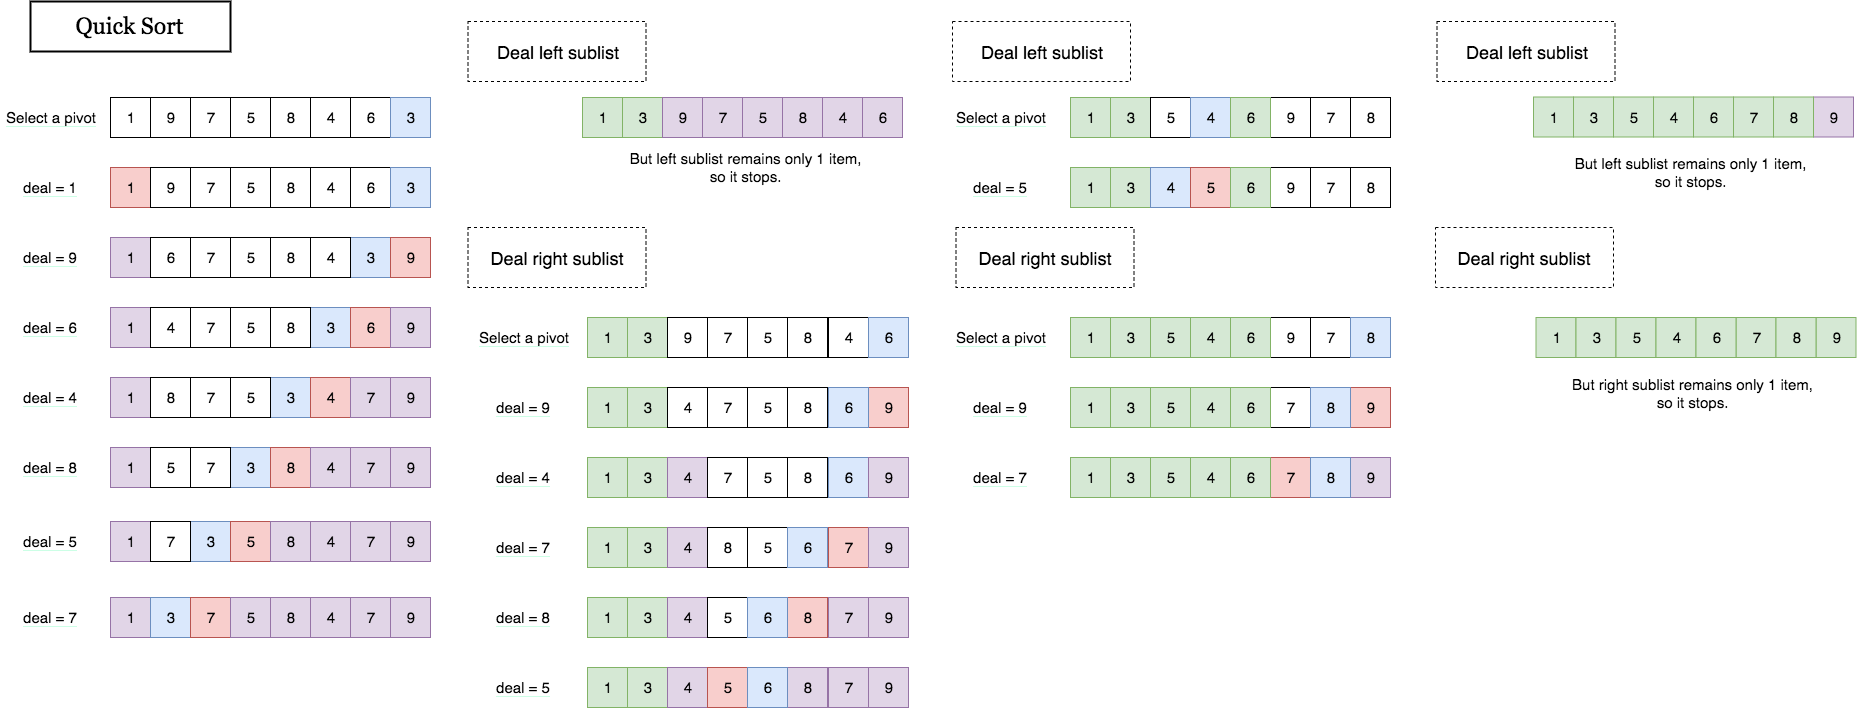

In [1]:
from IPython.display import Image
Image(filename = "QuickSort.png", height = 1000, width = 1500)

## 我的想法是：


1. First Run : 
    + 選擇list的最後一個Node作為Pivot
    + 比Pivot小的原地不動
    + 比Pivot大的則移到Pivot的後面一個，因此Pivot跟著前進一個
    + 直到Pivot前面的Node已經是比較過的
    + 那麼Pivot所在位置就確定了，回傳Pivot位置，和調整過後的data(list)


2. Next Run : 
    + 先看Pivot前面的sublist(data, 0, PivotPartition - 1)
    + Repart First Run 
    + 當最前面的sublist個數為1時，就轉而看Pivot後面的sublist(data, PivotPartiotion + 1, right)
    + 每一次都回傳Pivot的位置和調整過後的data(list)
    


## 程式碼

In [33]:
class QuickSort: #建立名為QuickSort的類別
    
    def __init__(self, data): 
        if type(data) is list:
            self.data = data  #限制傳入QuickSort的data為list型態
    
    def main(self): 
        self.run(0,len(self.data)-1) # 執行此function，就會開始進入排序流程
        return self.data # 回傳排序好的list
        
    def run(self, left, right): 
        if left < right: 
            IndexPivot = self.sorting(self.data, left, right) # 回傳Pivot的Index和調整過後的data(list)
            self.run(left, IndexPivot - 1) # 處理IndexPivot左邊的sublist
            self.run(IndexPivot + 1, right) # 處理IndexPivot右邊的sublist
        
    def sorting(self, data, left, right):
        Pivot = data[right] #選擇list的最右邊作為Pivot
        left_index = left #待排序list的最左邊
        right_index = right - 1 #待排序list的最右邊 
        
        while left_index <= right_index: #當left_index = right_index時仍剩下一個數字仍未排序

            if data[left_index] <= data[right]: #當該數字小於等於Pivot時，left_index往後挪一個，同時不移動該數字
                left_index += 1

            else:
                original_right = data[right_index]
                tmp = data[left_index]
                data[right_index], data[right] = Pivot, original_right #將Pivot和Pivot前一格數字交換
                if original_right != tmp: #當Pivot前面的數字為最後一個需要調整的數字時，不進行交換
                    data[left_index], data[right] = original_right , tmp #將大的數字和原Pivot前一個數字交換
                right_index -= 1 
                right -= 1 
                self.data = data #覆寫調整過後的list

        return right
        

In [37]:
list1 = [3,4,5,2,3,14,0,1]
b = QuickSort(list1)
b.main()

[0, 1, 2, 3, 3, 4, 5, 14]

<font color=2f416d size=4>驗證</font>

In [35]:
import random 

num = 100
list1 = [k for k in range(num + 2)]
random_list = []
for i in range(2,num + 2):
    random_list.append(random.sample(list1, i)) # 隨機生成100個list，list內的數字範圍介於0到101

In [36]:
correct = []
for i in random_list: 
    sortlist = sorted(i) # 排序好的100個list
    bb = QuickSort(i).main() # 利用QuickSort排序好的list
    if bb == sortlist: # 若用QuickSort排好的list 等於 排序好的list
        correct.append(1) 
    else:
        correct.append(0)

In [5]:
print("對的次數:" + str(sum(correct)))
print("錯的次數:" + str(num - sum(correct)))

對的次數:100
錯的次數:0


## 小小的心得


&emsp; 一開始的時候，對於QuickSort一點頭緒都沒有，想說Insertion Sort是基礎的話，先弄清楚Insertion Sort好了，結果把老師給的InsertionSort的流程圖搞懂就花了兩、三天吧，然後想說要照流程圖寫程式碼，結果還是寫不太出來，於是我就去看了LeetCode上大神寫的程式碼，那個大神畫了一個很簡單的概念圖，就按那個概念圖把程式碼放在下面，**我就覺得好像理解別人的流程圖未必能幫我自己寫出程式碼**，因為那畢竟是人家的邏輯，後來我就想說還是我自己把每一次的變化都列下來好了，結果真的好很多，就是把一次的移動調整都畫下來，然後去寫寫程式碼看能不能實現，現在這個版本，也是試了好幾次，最後有試出來真的是蠻有成就感的((撒花!!!